In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
dataset=pd.read_csv("/Users/aayushjain/codes/project/Fino/project 3/dataset_instagram-reel-scraper_2024-03-02_11-54-43-030.csv")

In [109]:
dataset['isSponsored'].unique()

array([False])

In [110]:
dataset.dropna(axis=1, how='any',inplace=True)

In [111]:
dataset.drop(['dimensionsHeight','dimensionsHeight','displayUrl','id','inputUrl','isSponsored','ownerId','ownerUsername','shortCode','videoUrl'],axis=1, inplace=True)

In [112]:
dataset.head()

,caption,commentsCount,dimensionsWidth,likesCount,ownerFullName,productType,timestamp,type,url,videoDuration,videoViewCount
0,Presenting the key highlights of our 9M FY24 f...,5,1080,188,Jana Small Finance Bank Ltd,clips,2024-02-23T15:20:40.000Z,Video,https://www.instagram.com/p/C3sd7iiJ3_S/,52.651,838
1,"Jana SFB wishes you a Diwali filled with love,...",1,750,128,Jana Small Finance Bank Ltd,clips,2023-11-12T16:09:00.000Z,Video,https://www.instagram.com/p/CzjVkpBpahl/,23.623,765
2,Shift your life to top gear with Jana SFB’s Tw...,1,750,106,Jana Small Finance Bank Ltd,clips,2024-01-17T04:30:00.000Z,Video,https://www.instagram.com/p/C2MCMvwPwE0/,12.634,757
3,Unveiling RuPay Zodiac Debit Cards for Exclusi...,2,1080,134,Jana Small Finance Bank Ltd,clips,2024-02-22T10:49:44.000Z,Video,https://www.instagram.com/p/C3paBEIJh-h/,36.160,651
4,May the jingle of bells fill your heart with j...,1,750,143,Jana Small Finance Bank Ltd,clips,2023-12-25T02:30:00.000Z,Video,https://www.instagram.com/p/C1QmMJDpwO2/,15.835,1024


In [113]:
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])

dataset['day'] = dataset['timestamp'].dt.day_name()
dataset['hour'] = dataset['timestamp'].dt.hour

In [114]:
dataset['type'].nunique()
dataset.drop('type',axis=1,inplace=True)

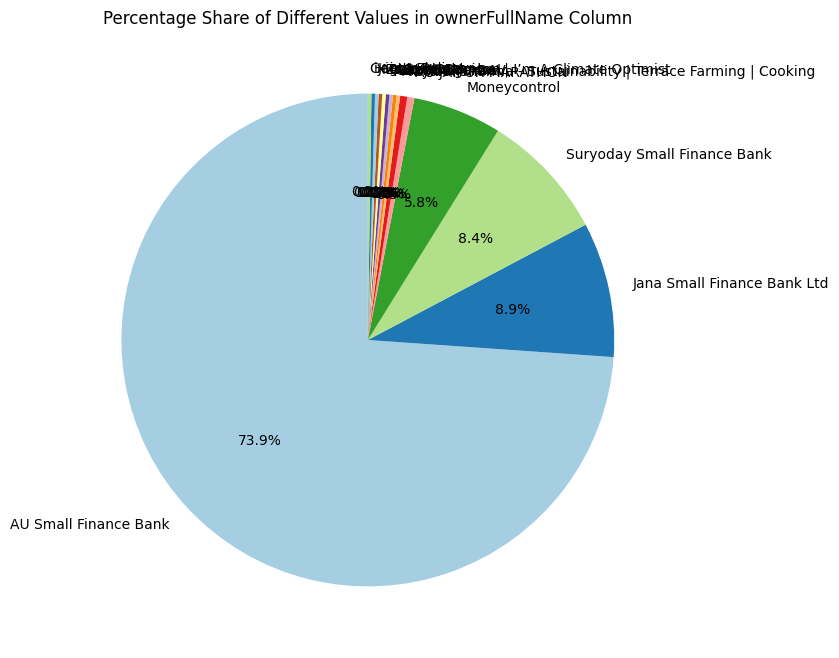

In [115]:
percentage_share = dataset['ownerFullName'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_share, labels=percentage_share.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Share of Different Values in ownerFullName Column')
plt.show()

In [116]:
specified_values = ['AU Small Finance Bank', 'Moneycontrol', 'Suryoday Small Finance Bank', 'Jana Small Finance Bank Ltd']

dataset['ownerFullName'] = dataset['ownerFullName'].apply(lambda x: x if x in specified_values else 'Other')

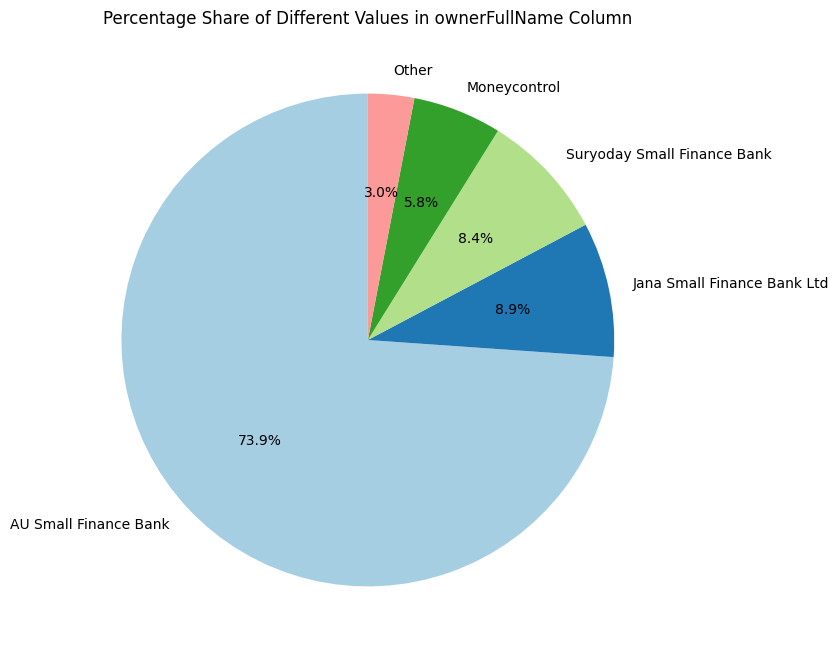

In [117]:
percentage_share = dataset['ownerFullName'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_share, labels=percentage_share.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Share of Different Values in ownerFullName Column')
plt.show()

In [118]:
dataset.drop('dimensionsWidth',axis=1,inplace=True)
dataset.describe()

,commentsCount,likesCount,videoDuration,videoViewCount,hour
count,429.000000,429.000000,429.000000,4.290000e+02,429.000000
mean,9.853147,1521.233100,45.053000,2.327335e+04,8.174825
std,41.125570,13458.198527,57.138582,1.487465e+05,4.187735
min,0.000000,23.000000,2.000000,0.000000e+00,1.000000
25%,1.000000,160.000000,10.966000,1.313000e+03,4.000000
50%,3.000000,232.000000,19.866000,2.018000e+03,8.000000
75%,7.000000,436.000000,56.166000,3.813000e+03,12.000000
max,630.000000,236113.000000,511.066000,2.270960e+06,19.000000


In [119]:
import langid
def classify_language(message):
    if isinstance(message, str): 
        lang, _ = langid.classify(message)
        if lang == 'hi':
            return 0 
        elif lang == 'en':
            return 2 
        else:
            return 1  
    else:
        return np.nan  

dataset['Language_Category'] = dataset['caption'].apply(classify_language)

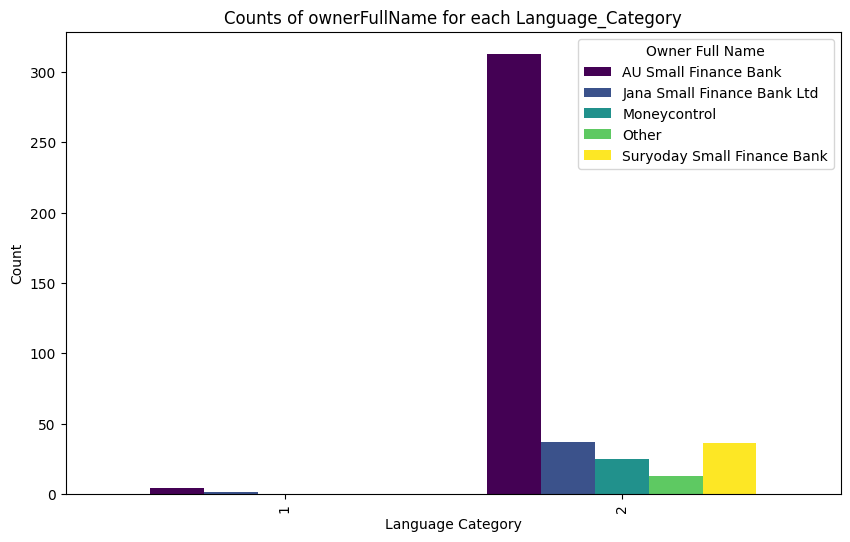

In [120]:
grouped_counts = dataset.groupby(['Language_Category', 'ownerFullName']).size().unstack()

grouped_counts.plot(kind='bar', figsize=(10, 6), width=0.8, colormap='viridis')

plt.title('Counts of ownerFullName for each Language_Category')
plt.xlabel('Language Category')
plt.ylabel('Count')
plt.legend(title='Owner Full Name')

plt.show()

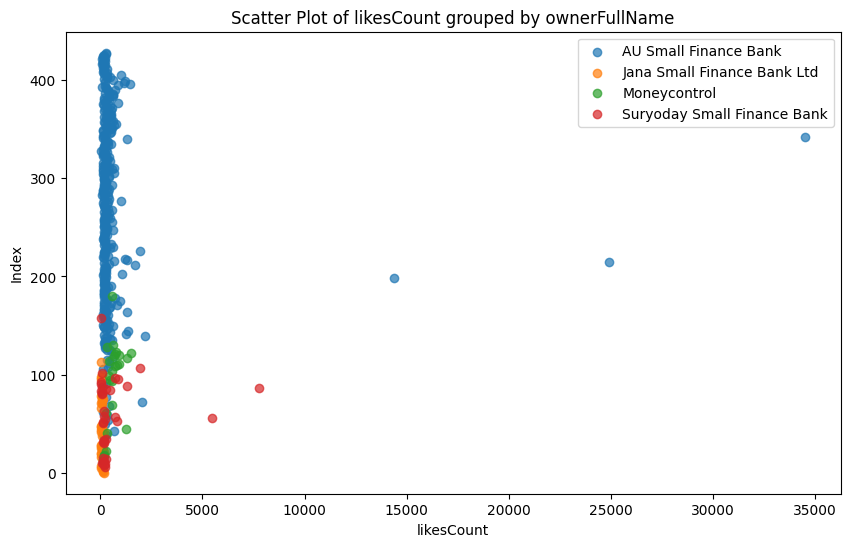

In [121]:
grouped_data = dataset[dataset['ownerFullName'] != 'Other'].groupby('ownerFullName')
plt.figure(figsize=(10, 6))  
for owner_full_name, group_data in grouped_data:
    plt.scatter(group_data['likesCount'], group_data.index, label=owner_full_name, alpha=0.7)

plt.title('Scatter Plot of likesCount grouped by ownerFullName')
plt.xlabel('likesCount')
plt.ylabel('Index')
plt.legend()
plt.show()

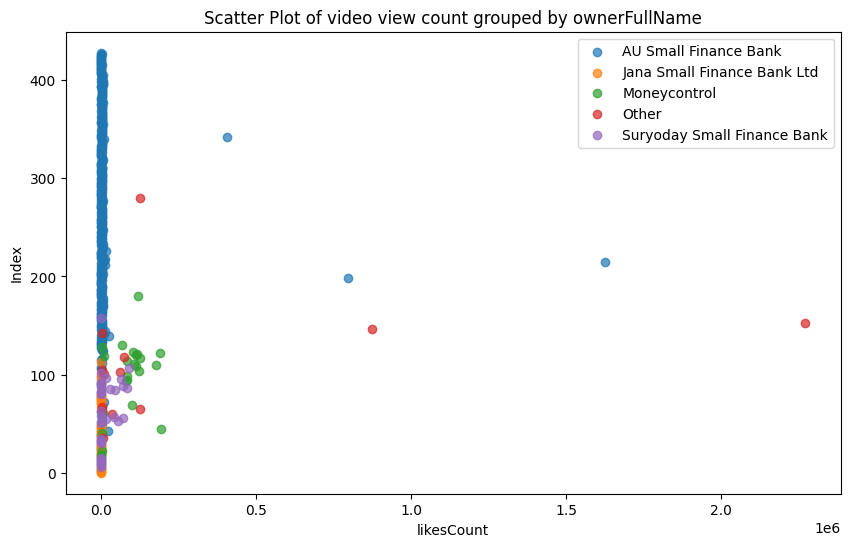

In [122]:
grouped_data = dataset.groupby('ownerFullName')
plt.figure(figsize=(10, 6))  
for owner_full_name, group_data in grouped_data:
    plt.scatter(group_data['videoViewCount'], group_data.index, label=owner_full_name, alpha=0.7)

plt.title('Scatter Plot of video view count grouped by ownerFullName')
plt.xlabel('likesCount')
plt.ylabel('Index')
plt.legend()
plt.show()

In [123]:
dataset[dataset['ownerFullName']=='Moneycontrol']

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
13,"Dive into the story of the Chintan Foundation,...",0,104,Moneycontrol,clips,2024-03-02 09:48:35+00:00,https://www.instagram.com/p/C4AeQZbSPFi/,211.480,928,Saturday,9,2
17,"Step into Bhaleswar, Odisha, where Saroj Agraw...",2,192,Moneycontrol,clips,2024-03-01 05:59:29+00:00,https://www.instagram.com/p/C39fKrFtrpB/,197.695,1698,Friday,5,2
18,Explore the story of SwachhataPukare with Gaur...,2,163,Moneycontrol,clips,2024-02-29 06:19:07+00:00,https://www.instagram.com/p/C368mhhvKng/,198.368,1453,Thursday,6,2
22,"Dive deep into the heart of Vimukti Sanstha, a...",5,269,Moneycontrol,clips,2024-02-28 05:57:31+00:00,https://www.instagram.com/p/C34VWUUvbF6/,205.195,2743,Wednesday,5,2
40,Embark on a transformative journey with Major ...,13,310,Moneycontrol,clips,2024-02-16 07:47:32+00:00,https://www.instagram.com/p/C3ZoaAOvcPI/,170.853,3821,Friday,7,2
45,Join us on an inspiring journey with Varun Rav...,7,1230,Moneycontrol,clips,2024-02-11 07:42:47+00:00,https://www.instagram.com/p/C3Mv5PyvgZD/,172.293,194037,Sunday,7,2
61,Ignite the spirit of change with #BadlaavHumse...,2,298,Moneycontrol,clips,2024-02-05 05:54:07+00:00,https://www.instagram.com/p/C29GxX5vPzn/,45.040,6703,Monday,5,2
69,Join us on a remarkable journey of inclusivity...,0,563,Moneycontrol,clips,2024-01-29 10:33:20+00:00,https://www.instagram.com/p/C2rlIT3vMSn/,159.200,101830,Monday,10,2
93,"In the heart of Bengaluru's innovation hub, a ...",0,567,Moneycontrol,clips,2024-01-27 08:59:01+00:00,https://www.instagram.com/p/C2mQpPfv0-9/,185.226,81445,Saturday,8,2
94,Step into the world of innovation and educatio...,0,483,Moneycontrol,clips,2024-01-24 07:26:05+00:00,https://www.instagram.com/p/C2eXqXNBA6V/,203.720,83154,Wednesday,7,2


In [124]:
dataset[dataset['videoViewCount'] == dataset['videoViewCount'].max()]

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
153,Aapko bhi AU se pyaar ho jaayega 🎵\nWith Month...,630,236113,Other,clips,2023-10-17 04:13:56+00:00,https://www.instagram.com/p/CyfG5zzPhde/,30.0,2270960,Tuesday,4,2


In [125]:
dataset_au=dataset[dataset['ownerFullName']=='AU Small Finance Bank']
dataset_jsb=dataset[dataset['ownerFullName']=='Jana Small Finance Bank Ltd']
dataset_ssb=dataset[dataset['ownerFullName']=='Suryoday Small Finance Bank']

In [126]:
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def analyze_hashtags(df):
    # Concatenate all captions into a single string
    all_captions = ' '.join(df['caption'].astype(str))

    # Extract hashtags using regular expression
    hashtags = re.findall(r'#\w+', all_captions)

    # Count the occurrences of each hashtag
    hashtags_counter = Counter(hashtags)
    hashtags_dict = dict(hashtags_counter)
    print(hashtags_dict)

    # Get the top 5 most common hashtags
    top_5_frequencies = hashtags_counter.most_common(5)
    print(top_5_frequencies)

    # Filter hashtags with count greater than 5
    top_5_frequencies = {k: v for k, v in hashtags_dict.items() if v > 5}

    # Create lists for plotting
    words = list(top_5_frequencies.keys())
    counts = list(top_5_frequencies.values())

    # Plot the bar chart
    plt.bar(words, counts, color='pink')
    plt.xlabel('Hashtags')
    plt.xticks(rotation=90)
    plt.ylabel('Counts')
    plt.title('Hashtags Counts (Count > 5)')
    plt.show()

    # Generate and plot the WordCloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        min_word_length=3,
        max_words=100,
        collocations=False
    ).generate(all_captions)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


{'#BadlaavHumseHai': 89, '#AUSmallFinanceBank': 123, '#Changemakers': 1, '#ZeroDiscriminationDay': 1, '#EmployeeAppreciationDay': 1, '#SafeBanking': 15, '#Alert': 1, '#FinancialAdWISE': 2, '#Blogs': 1, '#TaxSavings': 1, '#APKFraud': 1, '#Beware': 1, '#StayAlert': 2, '#ValentinesDay': 4, '#AUJaipurMarathon': 1, '#BeJaipurLegend': 1, '#AUJM2024': 1, '#BankingLoveLanguage': 1, '#SaferInternetDay': 2, '#BanoChampion': 4, '#SportsTournament': 1, '#StateLevel': 1, '#Champions': 1, '#MCMaryKom': 1, '#SportsInspiration': 1, '#BrandTune': 1, '#Music': 1, '#HappyPizzaDay': 1, '#AUDebitandCreditCards': 1, '#AUCards': 5, '#OvenStory': 1, '#9MResults': 1, '#AUCurrentAccount': 1, '#Convenience': 1, '#Uttrayan': 1, '#MaghBihu': 1, '#Lohri': 2, '#Pongal': 2, '#Sankranti': 1, '#Foodie': 1, '#SesonsGreeting': 1, '#MerryChristmas': 3, '#AUSavingsAccount': 1, '#MonthlyInterestPayout': 2, '#AdvanceTaxPayment': 1, '#VijayDiwas': 1, '#IndianArmy': 1, '#Strongest': 1, '#ExplorePage': 3, '#IndianNavyDay': 1, '

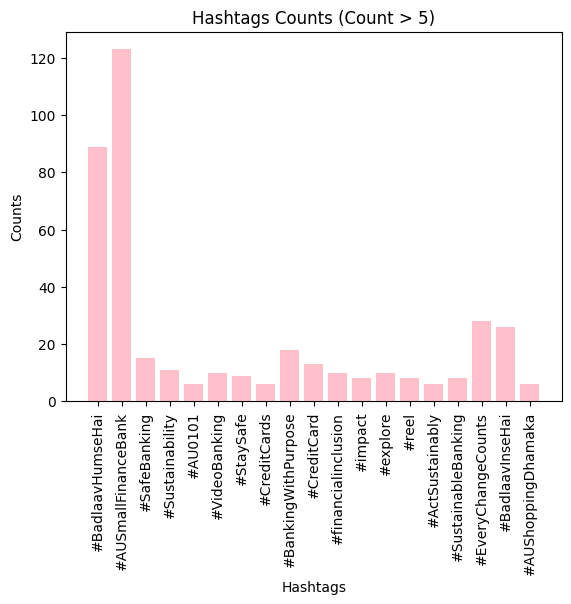

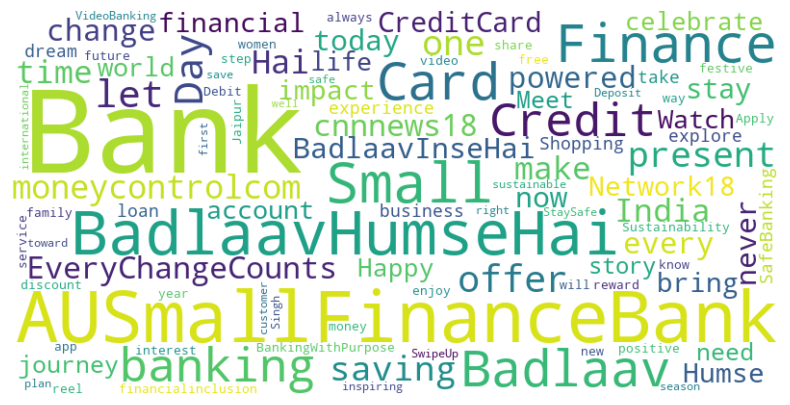

In [127]:
analyze_hashtags(dataset_au)

{'#janasfb': 2, '#quarterlyresults': 1, '#financialperformance': 1, '#DiwaliCelebration': 1, '#FestiveCheer': 1, '#Diwali': 1, '#Diwali2023': 1, '#JanaSFB': 14, '#Banking': 10, '#BikeLoans': 3, '#TwoWheelerLoans': 3, '#DreamsOnTwoWheels': 1, '#JanaSFBRides': 1, '#debitcards': 1, '#zodiac': 1, '#Exclusive': 1, '#Savingsaccount': 1, '#astrological': 1, '#Christmas': 1, '#MerryChristmas': 1, '#SantaClause': 1, '#JanaHitMeinJaari': 13, '#ConsumerAwareness': 13, '#StaySafe': 13, '#FreedomFromFrauds': 13, '#SecureBanking': 13, '#Secure': 13, '#SafeBanking': 13, '#IndependenceDay': 1, '#CommunityPartnership': 1, '#MakingADifference': 1, '#JanaSmallFinanceBank': 9, '#newbranch': 1, '#newbeginnings': 1, '#delhi': 1, '#IChooseMyAccount': 1, '#ICMA': 1, '#SapnoKaNumber': 1, '#JanaBank': 6, '#PersonalisedAccounts': 1, '#EasyLoans': 3, '#FixedDeposit': 1, '#Profit': 1, '#Returns': 1, '#FathersDay': 1, '#GuruPurnima': 1, '#Guidance': 1, '#Saving': 1, '#Interest': 1, '#FixedDeposits': 1, '#InterestRa

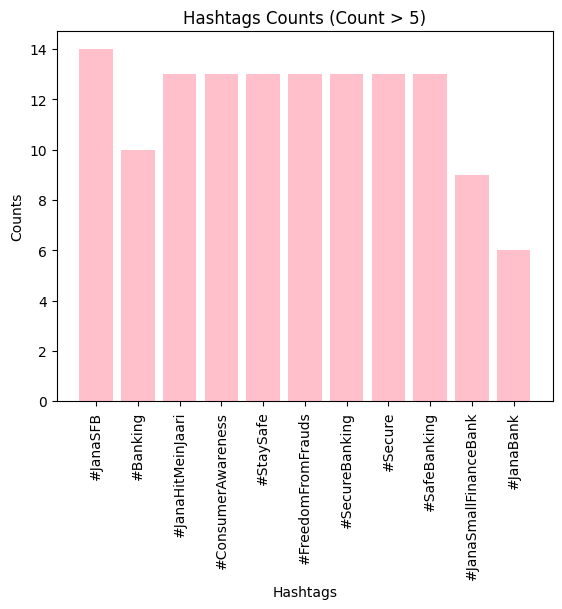

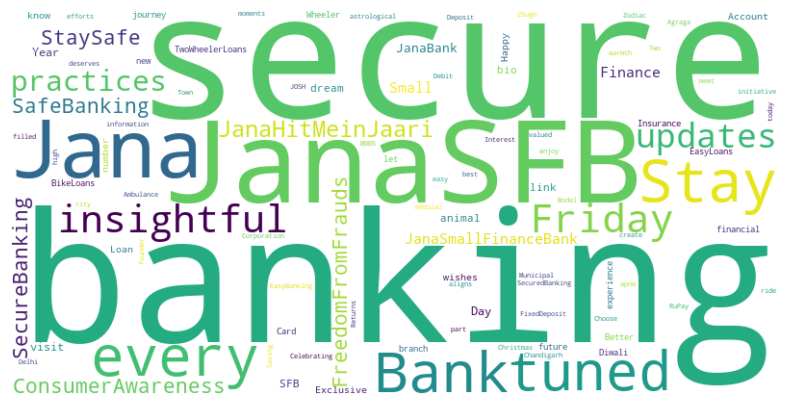

In [128]:
analyze_hashtags(dataset_jsb)

{'#powai': 1, '#mumbai': 4, '#branchlaunch': 1, '#suryodaybank': 24, '#bankofsmiles': 34, '#lohri': 2, '#pongal': 2, '#bihu': 2, '#harvestseason': 3, '#celebrations': 2, '#andheri': 1, '#newbranch': 1, '#launch': 3, '#airoli': 1, '#thane': 1, '#republicday': 1, '#india': 1, '#qrcode': 1, '#qr': 1, '#ganeshchaturthi': 1, '#ganesha': 1, '#fixeddeposit': 1, '#savingsaccount': 1, '#deposits': 1, '#results': 1, '#twowheeler': 1, '#2wheeler': 1, '#loans': 1, '#makarsankranti': 1, '#stayblessed': 2, '#finance': 1, '#financialresults': 1, '#fy23': 1, '#contestalert': 1, '#contest': 1, '#newyear2023': 1, '#selfiecontest': 1, '#recurringdeposit': 1, '#rd': 1, '#investments': 1, '#deposit': 1, '#NoLockdownOnSmiles': 6, '#stayhome': 6, '#staysafe': 6, '#quarantinelife': 6, '#socialdistancing': 6, '#stayhealthy': 6, '#selfquarantinemode': 6, '#selfquarantined': 6, '#quarantineselfcare': 6, '#lockdown': 6, '#lockdownindia': 6, '#lockdown2020': 3, '#staysafeeveryone': 6, '#keepsafe': 6, '#stayindoors

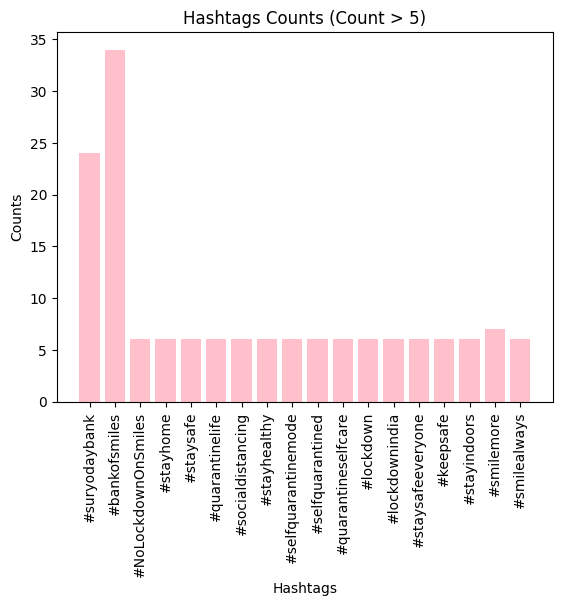

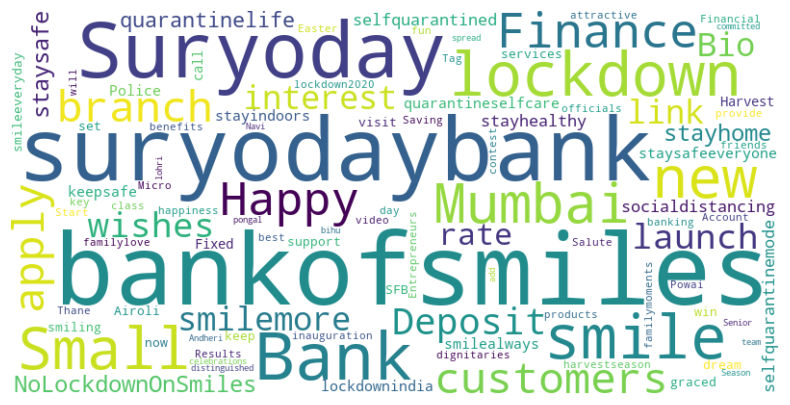

In [129]:
analyze_hashtags(dataset_ssb)

In [130]:
dataset_ssb.describe()

,commentsCount,likesCount,videoDuration,videoViewCount,hour,Language_Category
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.0
mean,1.305556,662.416667,34.922389,16808.694444,9.611111,2.0
std,1.369451,1544.075024,45.022456,28219.072552,4.224269,0.0
min,0.000000,24.000000,4.533000,0.000000,3.000000,2.0
25%,0.000000,108.250000,10.000000,556.500000,6.000000,2.0
50%,1.000000,161.500000,20.237500,900.000000,9.500000,2.0
75%,2.000000,306.500000,37.932750,19712.750000,13.250000,2.0
max,5.000000,7769.000000,240.500000,90625.000000,17.000000,2.0


In [131]:
dataset_au.describe()

,commentsCount,likesCount,videoDuration,videoViewCount,hour,Language_Category
count,317.000000,317.000000,317.000000,3.170000e+02,317.000000,317.000000
mean,8.687697,577.274448,38.337754,1.182207e+04,8.321767,1.987382
std,23.412109,2503.342623,49.544672,1.037837e+05,4.331654,0.111797
min,0.000000,25.000000,2.000000,5.860000e+02,1.000000,1.000000
25%,2.000000,181.000000,11.000000,1.486000e+03,4.000000,2.000000
50%,4.000000,244.000000,17.966000,2.091000e+03,8.000000,2.000000
75%,9.000000,410.000000,44.000000,3.419000e+03,12.000000,2.000000
max,356.000000,34542.000000,511.066000,1.625360e+06,19.000000,2.000000


In [132]:
dataset_jsb.describe()

,commentsCount,likesCount,videoDuration,videoViewCount,hour,Language_Category
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.552632,71.368421,21.924500,550.815789,6.394737,1.973684
std,1.031854,44.111910,20.925382,315.947725,3.560591,0.162221
min,0.000000,23.000000,9.166000,226.000000,2.000000,1.000000
25%,0.000000,38.500000,9.166000,333.500000,4.000000,2.000000
50%,0.000000,54.000000,12.617000,425.500000,6.000000,2.000000
75%,1.000000,89.000000,24.866000,659.250000,7.750000,2.000000
max,5.000000,188.000000,116.733000,1531.000000,16.000000,2.000000


In [133]:
def plot_likes_count_by_day(data,color):
    grouped_data = data.groupby('day')['likesCount'].median().reset_index()
    plt.bar(grouped_data['day'], grouped_data['likesCount'], color=color)
    plt.title('LikesCount by Day')
    plt.xlabel('Day')
    plt.ylabel('Total LikesCount')
    plt.show()
def plot_likes_count_by_time(data,color):
    grouped_data = data.groupby('hour')['likesCount'].mean().reset_index()
    plt.bar(grouped_data['hour'], grouped_data['likesCount'], color=color)
    plt.title('LikesCount by Day')
    plt.xlabel('Day')
    plt.ylabel('Total LikesCount')
    plt.show()

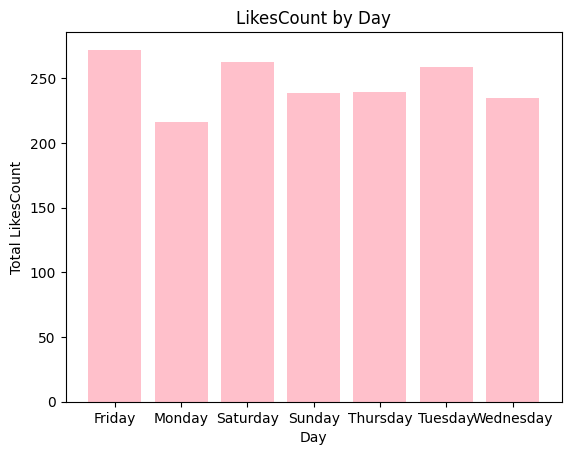

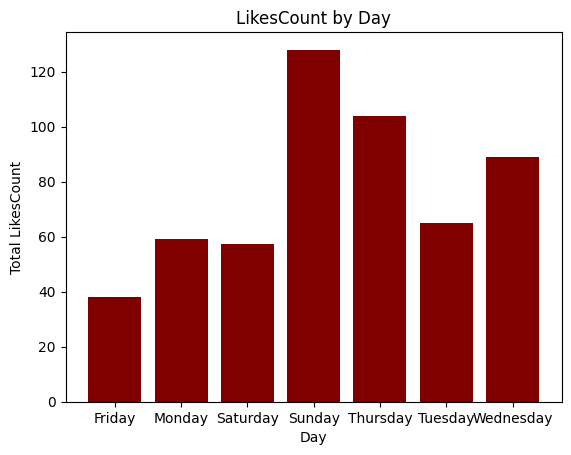

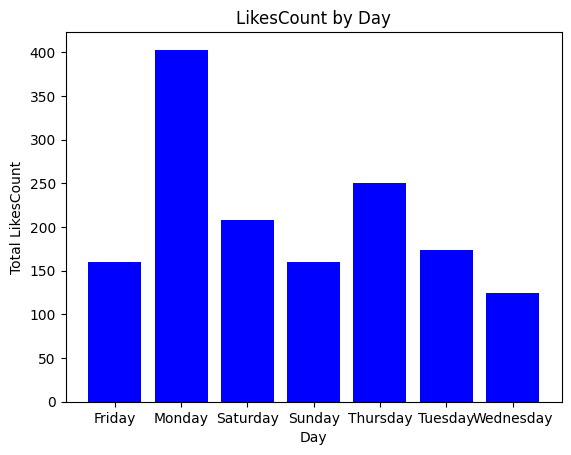

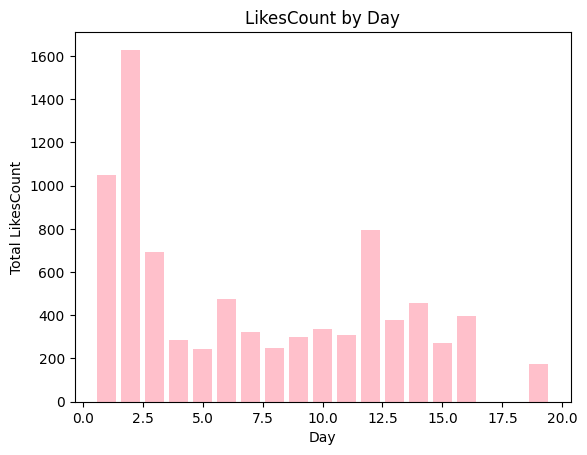

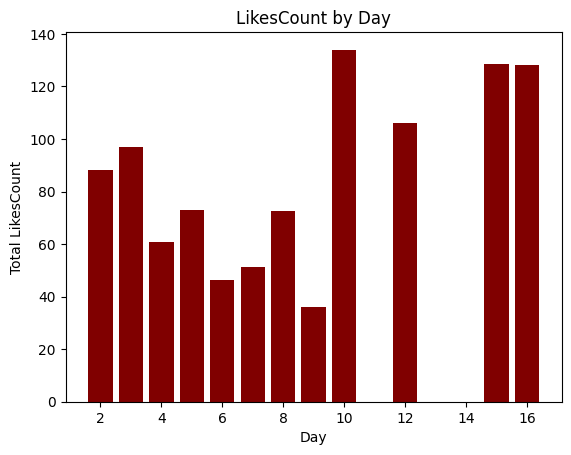

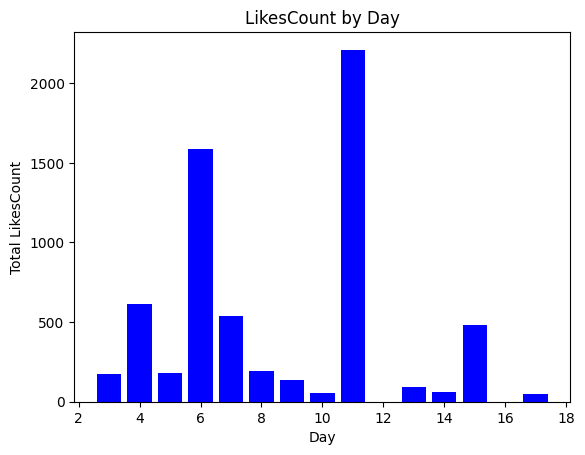

In [134]:
plot_likes_count_by_day(dataset_au,'pink')
plot_likes_count_by_day(dataset_jsb,'maroon')
plot_likes_count_by_day(dataset_ssb,'blue')
plot_likes_count_by_time(dataset_au,'pink')
plot_likes_count_by_time(dataset_jsb,'maroon')
plot_likes_count_by_time(dataset_ssb,'blue')

In [152]:
grouped_data = dataset_au.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram AU Bank:")
print(top_predictions[['day', 'hour', 'likesCount']])
grouped_data = dataset_ssb.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram Suryoday :")
print(top_predictions[['day', 'hour', 'likesCount']])
grouped_data = dataset_jsb.groupby(['day', 'hour'])['likesCount'].mean().reset_index()
sorted_data = grouped_data.sort_values(by='likesCount', ascending=False)
top_predictions = sorted_data.head(5)
print("Top 5 Best Time and Day to Post on Instagram Jana Small:")
print(top_predictions[['day', 'hour', 'likesCount']])

Top 5 Best Time and Day to Post on Instagram AU Bank:
          day  hour   likesCount
1      Friday     2  8792.500000
28   Saturday     3  2589.666667
11     Friday    12  2324.692308
39     Sunday     1  1470.000000
80  Wednesday     6  1326.000000
Top 5 Best Time and Day to Post on Instagram Suryoday :
         day  hour  likesCount
2     Friday    11      7769.0
4     Monday     6      5480.0
10  Saturday     7      1304.0
11  Saturday    15      1059.5
19   Tuesday     4       816.0
Top 5 Best Time and Day to Post on Instagram Jana Small:
         day  hour  likesCount
5     Friday    15       188.0
18   Tuesday     2       176.0
15  Thursday     3       152.0
12    Sunday     8       136.0
17  Thursday    10       134.0


In [136]:
dataset.head()

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
0,Presenting the key highlights of our 9M FY24 f...,5,188,Jana Small Finance Bank Ltd,clips,2024-02-23 15:20:40+00:00,https://www.instagram.com/p/C3sd7iiJ3_S/,52.651,838,Friday,15,2
1,"Jana SFB wishes you a Diwali filled with love,...",1,128,Jana Small Finance Bank Ltd,clips,2023-11-12 16:09:00+00:00,https://www.instagram.com/p/CzjVkpBpahl/,23.623,765,Sunday,16,2
2,Shift your life to top gear with Jana SFB’s Tw...,1,106,Jana Small Finance Bank Ltd,clips,2024-01-17 04:30:00+00:00,https://www.instagram.com/p/C2MCMvwPwE0/,12.634,757,Wednesday,4,2
3,Unveiling RuPay Zodiac Debit Cards for Exclusi...,2,134,Jana Small Finance Bank Ltd,clips,2024-02-22 10:49:44+00:00,https://www.instagram.com/p/C3paBEIJh-h/,36.160,651,Thursday,10,2
4,May the jingle of bells fill your heart with j...,1,143,Jana Small Finance Bank Ltd,clips,2023-12-25 02:30:00+00:00,https://www.instagram.com/p/C1QmMJDpwO2/,15.835,1024,Monday,2,2


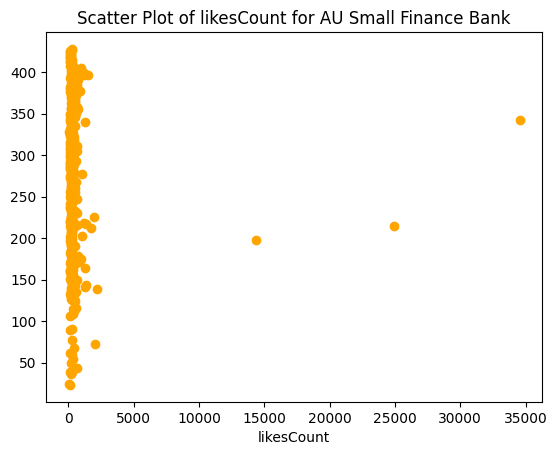

In [137]:
def plot(filtered_data, owner_full_name):
    plt.scatter(filtered_data['likesCount'], filtered_data.index, color='orange')
    plt.title(f'Scatter Plot of likesCount for {owner_full_name}')
    plt.xlabel('likesCount')
    plt.show()

plot(dataset_au,'AU Small Finance Bank')

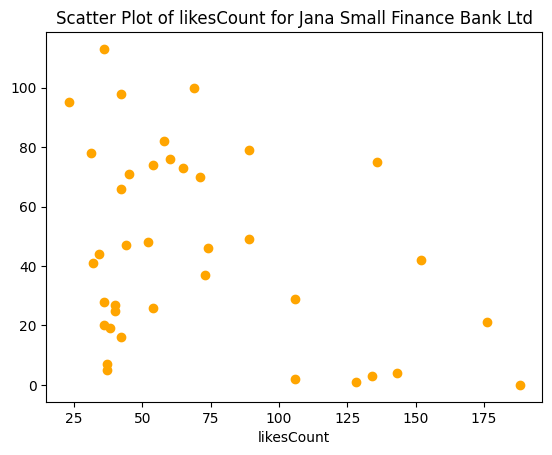

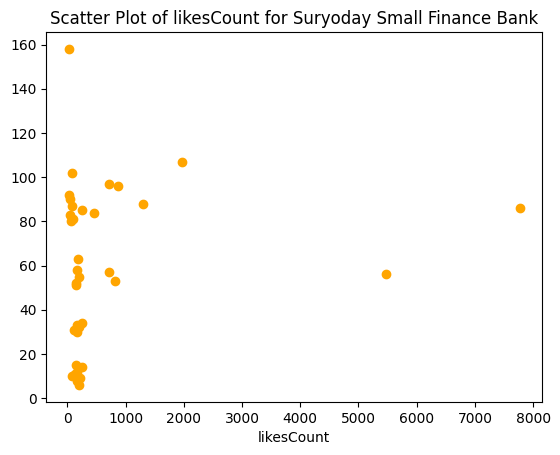

In [138]:
plot(dataset_jsb,'Jana Small Finance Bank Ltd')
plot(dataset_ssb,'Suryoday Small Finance Bank')

In [139]:
dataset_au.describe()

,commentsCount,likesCount,videoDuration,videoViewCount,hour,Language_Category
count,317.000000,317.000000,317.000000,3.170000e+02,317.000000,317.000000
mean,8.687697,577.274448,38.337754,1.182207e+04,8.321767,1.987382
std,23.412109,2503.342623,49.544672,1.037837e+05,4.331654,0.111797
min,0.000000,25.000000,2.000000,5.860000e+02,1.000000,1.000000
25%,2.000000,181.000000,11.000000,1.486000e+03,4.000000,2.000000
50%,4.000000,244.000000,17.966000,2.091000e+03,8.000000,2.000000
75%,9.000000,410.000000,44.000000,3.419000e+03,12.000000,2.000000
max,356.000000,34542.000000,511.066000,1.625360e+06,19.000000,2.000000


In [140]:
dataset_au_viral_values=dataset_au['videoViewCount'].quantile(0.75)
dataset_au_viral = dataset_au[dataset_au['videoViewCount'] >= dataset_au_viral_values]


In [141]:
dataset_au_viral.describe()

,commentsCount,likesCount,videoDuration,videoViewCount,hour,Language_Category
count,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.00000
mean,21.225000,1607.637500,30.180163,4.130136e+04,9.162500,1.97500
std,43.781961,4858.178067,34.901819,2.047094e+05,4.381907,0.15711
min,0.000000,271.000000,2.000000,3.419000e+03,1.000000,1.00000
25%,5.000000,455.250000,10.776500,3.882000e+03,5.750000,2.00000
50%,9.000000,577.000000,18.055500,4.721500e+03,11.500000,2.00000
75%,19.000000,881.250000,30.000000,7.036750e+03,12.000000,2.00000
max,356.000000,34542.000000,204.000000,1.625360e+06,16.000000,2.00000


In [142]:
dataset_au_viral.head()

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
43,"This Valentines Day, we asked couples how comp...",8,643,AU Small Finance Bank,clips,2024-02-13 11:27:50+00:00,https://www.instagram.com/p/C3STEjBt0_H/,15.000,22727,Tuesday,11,2
72,Championing the spirit of sports with MC Mary ...,8,2031,AU Small Finance Bank,clips,2024-02-02 13:47:29+00:00,https://www.instagram.com/p/C22OA8GB8my/,39.634,11482,Friday,13,2
112,Savings is always on our menu!\n#AUSmallFinanc...,1,414,AU Small Finance Bank,clips,2024-01-05 14:03:04+00:00,https://www.instagram.com/p/C1uKIMoPH9Z/,19.158,3840,Friday,14,2
116,AU Savings Account is here to save you from lo...,28,577,AU Small Finance Bank,clips,2023-12-29 13:59:34+00:00,https://www.instagram.com/p/C1cIJIZtdvK/,11.005,4698,Friday,13,2
124,Stay on top of your finances and avoid interes...,11,513,AU Small Finance Bank,clips,2023-12-11 13:55:17+00:00,https://www.instagram.com/p/C0txV9nC4_p/,16.017,7527,Monday,13,2


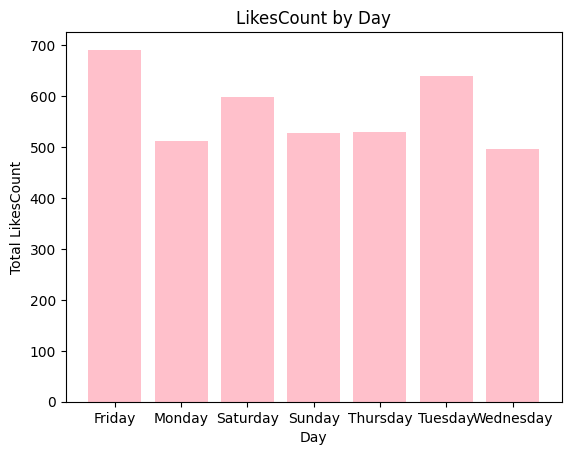

In [143]:
plot_likes_count_by_day(dataset_au_viral,'pink')

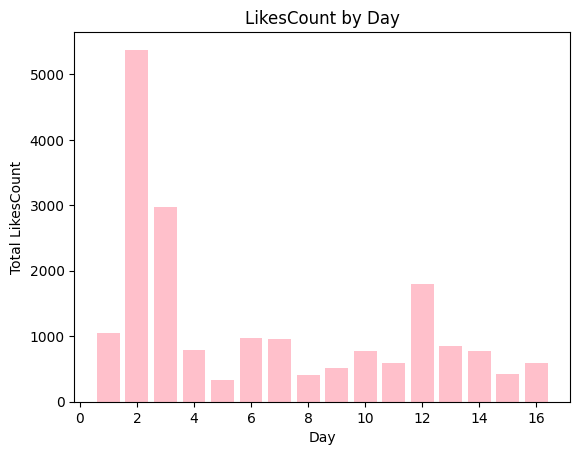

In [144]:
plot_likes_count_by_time(dataset_au_viral,'pink')

{'#AUSmallFinanceBank': 34, '#BadlaavHumseHai': 28, '#ValentinesDay': 1, '#BanoChampion': 1, '#MCMaryKom': 1, '#SportsInspiration': 1, '#Foodie': 1, '#AUSavingsAccount': 1, '#MonthlyInterestPayout': 1, '#AdvanceTaxPayment': 1, '#FinancialAdWISE': 1, '#Victory': 1, '#9': 1, '#WC2023': 1, '#Lookinglikeawow': 1, '#ExplorePage': 2, '#HeartToCart': 1, '#AUCards': 3, '#Offers': 1, '#SochBadloAurBankBhi': 1, '#SavingsAccount': 1, '#VideoBanking': 1, '#AU0101': 1, '#Dhanteras': 1, '#Gold': 1, '#Savings': 3, '#SA': 1, '#ganpatibappamorya': 1, '#CarLoans': 1, '#SIP': 2, '#Flexible': 1, '#Investment': 1, '#FinancialGoals': 1, '#BFFs': 1, '#Rewards': 1, '#DebitCards': 1, '#CreditCards': 1, '#Movie': 1, '#TheCrowningSymbolofSuccess': 1, '#CreditCard': 5, '#MythVsFact': 1, '#IndepedenceDay': 1, '#FreedomToChoose': 1, '#reels': 4, '#trending': 2, '#happybirthday': 1, '#kiaraadvani': 1, '#happybirthdaykiaraadvani': 1, '#AUSFB': 1, '#badlaavhumsehai': 2, '#Expenses': 1, '#creditcards': 1, '#explore': 7

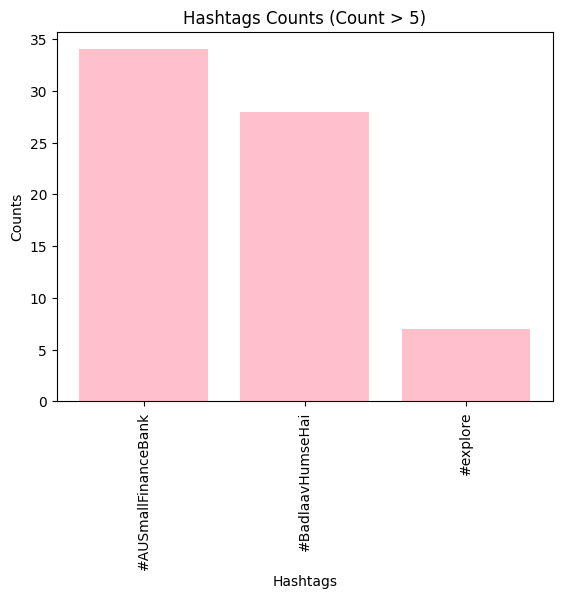

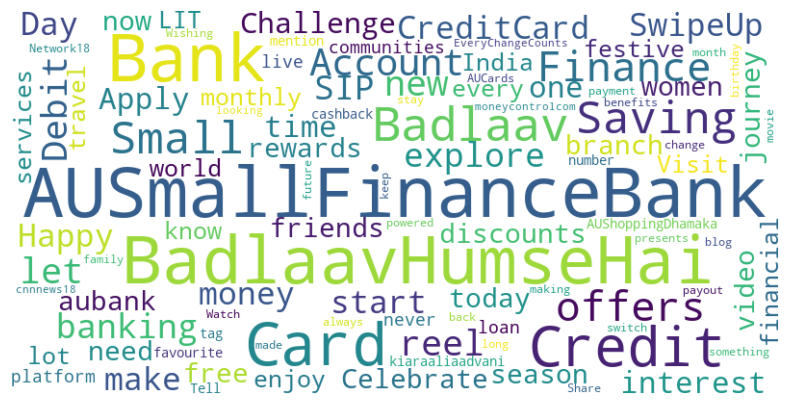

In [145]:
analyze_hashtags(dataset_au_viral)

/var/folders/q_/dn720rf91691y39h0s_hr_280000gn/T/ipykernel_89444/3511315763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_au_viral['videoDuration'] = pd.to_numeric(dataset_au_viral['videoDuration'], errors='coerce')


Text(0.5, 1.0, 'Histogram of Video Durations')

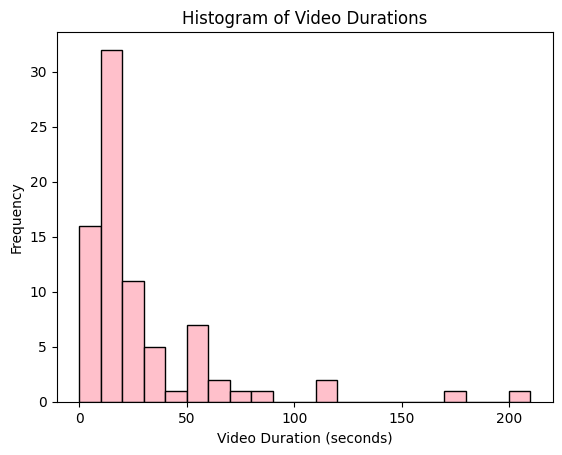

In [146]:
dataset_au_viral['videoDuration'] = pd.to_numeric(dataset_au_viral['videoDuration'], errors='coerce')

# Create a histogram with bins of 10 seconds
plt.hist(dataset_au_viral['videoDuration'], bins=range(0, int(dataset_au_viral['videoDuration'].max()) + 10, 10), color='pink', edgecolor='black')

# Add labels and title
plt.xlabel('Video Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Histogram of Video Durations')

# Show the plot

In [147]:
dataset_au_viral[dataset_au_viral['videoDuration']==dataset_au_viral['videoDuration'].max()]
#dataset[dataset['videoViewCount'] == dataset['videoViewCount'].max()]

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
384,There is no occasion better than #Ganeshotsav ...,27,630,AU Small Finance Bank,igtv,2021-09-10 01:54:44+00:00,https://www.instagram.com/p/CTn5SaOjgJ5/,204.0,4549,Friday,1,2


In [148]:
dataset['productType'].unique()

array(['clips', 'feed', 'igtv'], dtype=object)

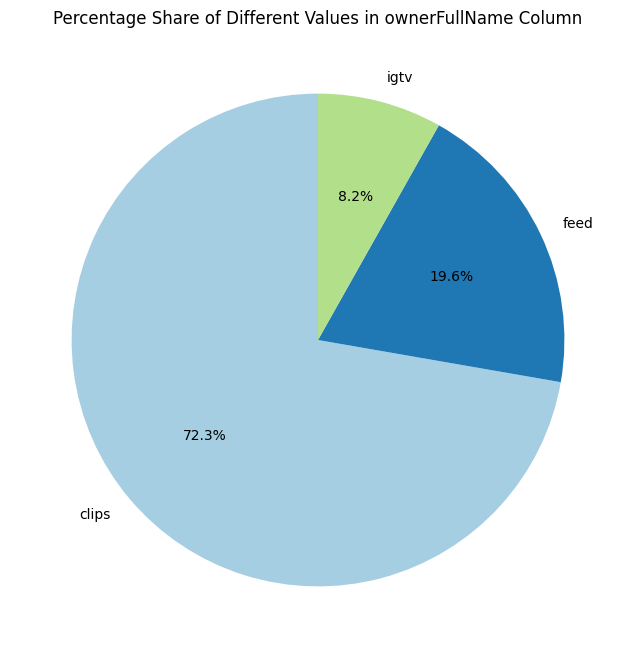

In [149]:
percentage_share = dataset['productType'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
plt.pie(percentage_share, labels=percentage_share.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Share of Different Values in ownerFullName Column')
plt.show()

In [150]:
dataset[dataset['productType']=='feed']

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
53,I miss going to the park to play with my frien...,0,816,Suryoday Small Finance Bank,feed,2020-04-14 04:30:20+00:00,https://www.instagram.com/p/B-8qsl-K7oU/,10.000,54854,Tuesday,4,2
55,"From different parts of the city, jamming over...",2,208,Suryoday Small Finance Bank,feed,2020-04-25 04:30:23+00:00,https://www.instagram.com/p/B_Y_ckAKFDv/,10.000,15226,Saturday,4,2
56,Suryoday Small Finance Bank wishes you all a v...,1,5480,Suryoday Small Finance Bank,feed,2020-04-13 06:54:31+00:00,https://www.instagram.com/p/B-6WZjgKxq8/,20.433,71921,Monday,6,2
57,Lockdown keeps me away from grandpa and grandm...,0,711,Suryoday Small Finance Bank,feed,2020-04-12 04:30:19+00:00,https://www.instagram.com/p/B-3hG0UqCSQ/,10.000,43032,Sunday,4,2
80,For brighter tomorrows #bankofsmiles @kanavu_a...,0,58,Suryoday Small Finance Bank,feed,2020-10-21 14:42:31+00:00,https://www.instagram.com/p/CGm_vU3hNqG/,39.633,414,Wednesday,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...
424,"With your privacy and security locked in, you ...",2,129,AU Small Finance Bank,feed,2020-12-19 03:35:11+00:00,https://www.instagram.com/p/CI9uUKPh3H1/,8.033,1370,Saturday,3,2
425,This #WorldSavingsDay take a step towards secu...,6,104,AU Small Finance Bank,feed,2020-10-30 07:30:22+00:00,https://www.instagram.com/p/CG9Ze0bhCSH/,34.133,1035,Friday,7,2
426,With every second individual under the age of ...,4,178,AU Small Finance Bank,feed,2021-01-12 07:33:10+00:00,https://www.instagram.com/p/CJ78m2wh4wG/,6.200,1314,Tuesday,7,2
427,We have no tricks up our sleeves when it comes...,4,270,AU Small Finance Bank,feed,2021-04-01 02:24:45+00:00,https://www.instagram.com/p/CNG0Ivonp9r/,6.000,2363,Thursday,2,2


In [151]:
dataset_au_viral.head()

,caption,commentsCount,likesCount,ownerFullName,productType,timestamp,url,videoDuration,videoViewCount,day,hour,Language_Category
43,"This Valentines Day, we asked couples how comp...",8,643,AU Small Finance Bank,clips,2024-02-13 11:27:50+00:00,https://www.instagram.com/p/C3STEjBt0_H/,15.000,22727,Tuesday,11,2
72,Championing the spirit of sports with MC Mary ...,8,2031,AU Small Finance Bank,clips,2024-02-02 13:47:29+00:00,https://www.instagram.com/p/C22OA8GB8my/,39.634,11482,Friday,13,2
112,Savings is always on our menu!\n#AUSmallFinanc...,1,414,AU Small Finance Bank,clips,2024-01-05 14:03:04+00:00,https://www.instagram.com/p/C1uKIMoPH9Z/,19.158,3840,Friday,14,2
116,AU Savings Account is here to save you from lo...,28,577,AU Small Finance Bank,clips,2023-12-29 13:59:34+00:00,https://www.instagram.com/p/C1cIJIZtdvK/,11.005,4698,Friday,13,2
124,Stay on top of your finances and avoid interes...,11,513,AU Small Finance Bank,clips,2023-12-11 13:55:17+00:00,https://www.instagram.com/p/C0txV9nC4_p/,16.017,7527,Monday,13,2
